In [1]:
import os
import pandas as pd
import glob

def read_csv_files(folder_path='input/stitch'):
    # Get list of all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path, '*.csv'))
    
    # Dictionary to store dataframes
    dataframes = {}
    
    # Read each CSV file and create a dataframe
    for file_path in csv_files:
        # Extract the tile number from the filename
        # Assuming the pattern is always *_tile{number}_*.csv
        filename = os.path.basename(file_path)
        try:
            tile_num = filename.split('tile')[1].split('_')[0]
            # Create dataframe name
            df_name = f'pd_tile{tile_num}'
            
            # Read the CSV file into a dataframe
            df = pd.read_csv(file_path)
            
            # Store the dataframe in the dictionary
            dataframes[df_name] = df
            
            print(f"Successfully read: {filename} -> {df_name}")
            
        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
    
    return dataframes

# Usage example:
# Read all CSV files and get the dictionary of dataframes
dfs = read_csv_files()

# Access individual dataframes
# They can be accessed like: dfs['pd_ile1'], dfs['pd_tile2'], etc.

# To create individual variables for each dataframe (if needed):
for df_name, df in dfs.items():
    globals()[df_name] = df
    
# Now you can access the dataframes directly as pd_tile1, pd_tile2, etc.

Successfully read: cp_masks_E3H5_Round1_DAPI_tile1_inference_centroids.csv -> pd_tile1
Successfully read: cp_masks_E3H5_Round1_DAPI_tile2_inference_centroids.csv -> pd_tile2
Successfully read: cp_masks_E3H5_Round1_DAPI_tile3_inference_centroids.csv -> pd_tile3
Successfully read: cp_masks_E3H5_Round1_DAPI_tile4_inference_centroids.csv -> pd_tile4
Successfully read: cp_masks_E3H5_Round1_DAPI_tile5_inference_centroids.csv -> pd_tile5
Successfully read: cp_masks_E3H5_Round1_DAPI_tile6_inference_centroids.csv -> pd_tile6


In [2]:
pd_tile1

,label,centroid-0,centroid-1,centroid-2,area
0,1,40.383033,84.005141,894.534704,389.0
1,2,40.228216,122.491701,907.354772,482.0
2,3,41.926078,116.018480,895.726899,487.0
3,4,42.717710,117.000000,920.169108,751.0
4,5,41.627586,95.955172,896.434483,290.0
...,...,...,...,...,...
45926,45927,825.892857,924.964286,69.142857,28.0
45927,45928,825.777778,929.666667,17.444444,27.0
45928,45929,825.647059,930.676471,112.000000,34.0
45929,45930,825.753247,959.025974,118.714286,77.0


In [3]:
pd_tile3

,label,centroid-0,centroid-1,centroid-2,area
0,1,19.079636,344.059245,500.353541,3629.0
1,2,26.396072,366.150330,522.318735,5754.0
2,3,15.065956,308.147901,501.198534,1501.0
3,4,17.709410,315.937376,523.092114,3018.0
4,5,14.037589,355.295035,521.125532,1410.0
...,...,...,...,...,...
26749,26750,669.156307,175.532450,27.067185,2188.0
26750,26751,670.214286,258.031030,3.545667,1708.0
26751,26752,670.910920,158.843391,9.188218,1392.0
26752,26753,669.323729,199.774576,26.647458,590.0


In [4]:
pd_tile5

,label,centroid-0,centroid-1,centroid-2,area
0,1,135.854167,993.708333,843.666667,48.0
1,2,137.800781,898.121094,952.375000,256.0
2,3,148.786168,908.131969,943.592096,2834.0
3,4,138.482759,902.689655,949.965517,29.0
4,5,139.489631,903.975806,881.010369,868.0
...,...,...,...,...,...
32391,32392,800.670429,131.541761,4.803612,443.0
32392,32393,800.270833,98.718750,38.572917,96.0
32393,32394,802.125000,37.229167,136.291667,48.0
32394,32395,802.206897,18.068966,150.068966,29.0


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_points(df):
    """
    Create a 3D scatter plot of points from a DataFrame
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing columns 'centroid-0', 'centroid-1', 'centroid-2'
    """
    # Create a new 3D figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Extract coordinates
    z = df['centroid-0']
    y = df['centroid-1']
    x = df['centroid-2']
    
    # Create scatter plot
    scatter = ax.scatter(x, y, z, 
                        # c='purple',
                        c=df['area'],  # Color points by area
                        cmap='viridis',
                        s=1,         # Point size
                        alpha=0.8)     # Transparency
    
    # Add labels and title
    ax.set_xlabel('X (centroid-0)')
    ax.set_ylabel('Y (centroid-1)')
    ax.set_zlabel('Z (centroid-2)')
    ax.set_title('3D Visualization of Centroids')
    
    # Add colorbar
    plt.colorbar(scatter, label='Area')
    
    # Adjust the viewing angle for better visualization
    ax.view_init(elev=20, azim=45)
    
    # Add grid
    ax.grid(True)
    
    return fig

# Example usage:
# Assuming your data is in a CSV file
# df = pd.read_csv('your_data.csv')





In [35]:
import pandas as pd
import numpy as np

# Define vertices (z, x, y format to match your data mapping)
vertices = [
    (0.00, 0.00, 0.00),      # tile1
    (0.00, 913.27, 5.24),    # tile2
    (1.66, 902.49, 920.44),  # tile3
    (2.32, -16.66, 917.27),  # tile4
    (3.75, -29.58, 1837.83), # tile5
    (5.24, 883.43, 1845.85)  # tile6
]

def apply_offset_to_tile(df, tile_number):
    """
    Apply offset to centroids based on tile number
    df: pandas DataFrame with centroid-0 (z), centroid-1 (x), centroid-2 (y)
    tile_number: number of the tile (1-6)
    """
    # Get the vertex offset for this tile (subtract 1 from tile_number for 0-based indexing)
    offset_z, offset_x, offset_y = vertices[tile_number - 1]
    
    # Create a copy of the DataFrame to avoid modifying the original
    df_offset = df.copy()
    
    # Apply offsets according to the mapping:
    # centroid-0 (z) += offset_z
    # centroid-1 (x) += offset_x
    # centroid-2 (y) += offset_y
    df_offset['centroid-0'] = df_offset['centroid-0'] + offset_z
    df_offset['centroid-2'] = df_offset['centroid-2'] + offset_x
    df_offset['centroid-1'] = df_offset['centroid-1'] + offset_y
    
    return df_offset

# Apply to all tiles (assuming dfs is your dictionary of dataframes from previous code)
mapped_dfs = {}
for i in range(1, 7):  # for tiles 1-6
    df_name = f'pd_tile{i}'
    if df_name in dfs:  # dfs is your dictionary of original dataframes
        mapped_dfs[f'map_tile{i}'] = apply_offset_to_tile(dfs[df_name], i)
        print(f"Applied offset to {df_name}")
    else:
        print(f"Warning: {df_name} not found in dataframes")

# Example usage for a single tile:
# map_tile1 = apply_offset_to_tile(pd_tile1, 1)

# To create individual variables for mapped dataframes (if needed):
for df_name, df in mapped_dfs.items():
    globals()[df_name] = df

# Now you can access them as map_tile1, map_tile2, etc.

Applied offset to pd_tile1
Applied offset to pd_tile2
Applied offset to pd_tile3
Applied offset to pd_tile4
Applied offset to pd_tile5
Applied offset to pd_tile6


In [36]:
map_tile1

,label,centroid-0,centroid-1,centroid-2,area
0,1,40.383033,84.005141,894.534704,389.0
1,2,40.228216,122.491701,907.354772,482.0
2,3,41.926078,116.018480,895.726899,487.0
3,4,42.717710,117.000000,920.169108,751.0
4,5,41.627586,95.955172,896.434483,290.0
...,...,...,...,...,...
45926,45927,825.892857,924.964286,69.142857,28.0
45927,45928,825.777778,929.666667,17.444444,27.0
45928,45929,825.647059,930.676471,112.000000,34.0
45929,45930,825.753247,959.025974,118.714286,77.0


In [37]:
def create_sub_maps():
    # Dictionary to store sub-mapped dataframes
    sub_mapped_dfs = {}
    
    # Filter conditions for each tile
    # map_tile1: x < 1000, y < 970
    sub_mapped_dfs['sub_map_tile1'] = map_tile1[
        (map_tile1['centroid-2'] < 954) & 
        (map_tile1['centroid-1'] < 970)
    ]
    
    # map_tile2: x > 1000, y < 970
    sub_mapped_dfs['sub_map_tile2'] = map_tile2[
        (map_tile2['centroid-2'] > 954) & 
        (map_tile2['centroid-1'] < 970)
    ]
    
    # map_tile3: x > 1000, 970 < y < 1900
    sub_mapped_dfs['sub_map_tile3'] = map_tile3[
        (map_tile3['centroid-2'] > 954) & 
        (map_tile3['centroid-1'] > 970) & 
        (map_tile3['centroid-1'] < 1900)
    ]
    
    # map_tile4: x < 1000, 970 < y < 1900
    sub_mapped_dfs['sub_map_tile4'] = map_tile4[
        (map_tile4['centroid-2'] < 954) & 
        (map_tile4['centroid-1'] > 970) & 
        (map_tile4['centroid-1'] < 1900)
    ]
    
    # map_tile5: x < 1000, y > 1900
    sub_mapped_dfs['sub_map_tile5'] = map_tile5[
        (map_tile5['centroid-2'] < 950) & 
        (map_tile5['centroid-1'] > 1900)
    ]
    
    # map_tile6: x > 1000, y > 1900
    sub_mapped_dfs['sub_map_tile6'] = map_tile6[
        (map_tile6['centroid-2'] > 954) & 
        (map_tile6['centroid-1'] > 1900)
    ]
    
    # Create individual variables for each sub-mapped dataframe
    for df_name, df in sub_mapped_dfs.items():
        globals()[df_name] = df
        print(f"{df_name}: {len(df)} points")
    
    return sub_mapped_dfs

# Create sub-mapped dataframes
sub_mapped_dfs = create_sub_maps()

# Optional: Function to verify the filtering conditions
def verify_sub_maps():
    for tile_num in range(1, 7):
        df = globals()[f'sub_map_tile{tile_num}']
        print(f"\nVerifying sub_map_tile{tile_num}:")
        print(f"X range (centroid-1): {df['centroid-1'].min():.2f} to {df['centroid-1'].max():.2f}")
        print(f"Y range (centroid-2): {df['centroid-2'].min():.2f} to {df['centroid-2'].max():.2f}")
        print(f"Number of points: {len(df)}")

# Run verification
verify_sub_maps()

sub_map_tile1: 40891 points
sub_map_tile2: 17987 points
sub_map_tile3: 22076 points
sub_map_tile4: 36448 points
sub_map_tile5: 29721 points
sub_map_tile6: 8558 points

Verifying sub_map_tile1:
X range (centroid-1): 0.18 to 969.98
Y range (centroid-2): 0.13 to 953.83
Number of points: 40891

Verifying sub_map_tile2:
X range (centroid-1): 6.07 to 969.98
Y range (centroid-2): 954.02 to 1678.54
Number of points: 17987

Verifying sub_map_tile3:
X range (centroid-1): 970.01 to 1899.94
Y range (centroid-2): 954.05 to 1740.94
Number of points: 22076

Verifying sub_map_tile4:
X range (centroid-1): 970.03 to 1900.00
Y range (centroid-2): -16.54 to 953.99
Number of points: 36448

Verifying sub_map_tile5:
X range (centroid-1): 1900.05 to 2860.01
Y range (centroid-2): -29.42 to 949.99
Number of points: 29721

Verifying sub_map_tile6:
X range (centroid-1): 1900.01 to 2867.75
Y range (centroid-2): 954.01 to 1592.48
Number of points: 8558


In [38]:
# Concatenate all sub-mapped tiles
all_points = pd.concat([sub_map_tile1, sub_map_tile2, sub_map_tile3, 
                       sub_map_tile4, sub_map_tile5, sub_map_tile6], 
                      ignore_index=True)

print(f"Total number of points after concatenation: {len(all_points)}")

Total number of points after concatenation: 155681


In [39]:
all_points

,label,centroid-0,centroid-1,centroid-2,area
0,1,40.383033,84.005141,894.534704,389.0
1,2,40.228216,122.491701,907.354772,482.0
2,3,41.926078,116.018480,895.726899,487.0
3,4,42.717710,117.000000,920.169108,751.0
4,5,41.627586,95.955172,896.434483,290.0
...,...,...,...,...,...
155676,12464,597.879241,2841.932278,1030.018608,158.0
155677,12468,600.622805,2862.193891,960.410090,1105.0
155678,12470,600.402712,2866.504237,971.524915,295.0
155679,12473,600.493333,2867.596667,989.230000,75.0


In [ ]:
# Save the concatenated data to a CSV file
all_points.to_csv('output/patch/Round1_coordinates_mapback_0112.csv', index=True)
print("File saved successfully as ")

In [45]:
sub_df = all_points[['centroid-2', 'centroid-1', 'centroid-0']]
    

,centroid-2,centroid-1,centroid-0
0,894.534704,84.005141,40.383033
1,907.354772,122.491701,40.228216
2,895.726899,116.018480,41.926078
3,920.169108,117.000000,42.717710
4,896.434483,95.955172,41.627586
...,...,...,...
155676,1030.018608,2841.932278,597.879241
155677,960.410090,2862.193891,600.622805
155678,971.524915,2866.504237,600.402712
155679,989.230000,2867.596667,600.493333


In [49]:
sub_df_move = sub_df
sub_df_move[['centroid-2', 'centroid-1']] = sub_df_move[['centroid-2', 'centroid-1']] + [17, 30]

C:\Users\Alexis\AppData\Local\Temp\ipykernel_136888\1646439920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df_move[['centroid-2', 'centroid-1']] = sub_df_move[['centroid-2', 'centroid-1']] + [17, 30]


In [50]:
# Save the concatenated data to a CSV file
sub_df.to_csv('output/patch/Round1_coordinates_mapback_0113_centroids.csv', index=False, header=False)

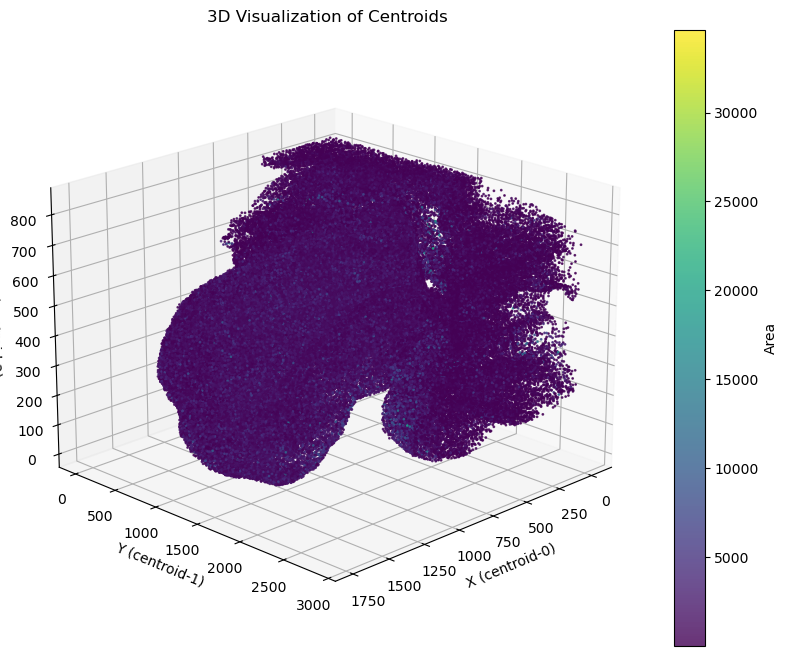

In [52]:
# Create and show the plot
fig = plot_3d_points(all_points)
plt.show()